In [1]:
import cdms2 as cdms
import MV2 as MV
import cdtime,cdutil,genutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import string
import glob
import scipy.stats as stats

import sys,os

sys.path.append("../python-utils")
import CMIP5_tools as cmip5
import DA_tools
import Plotting

from eofs.cdms import Eof
from eofs.multivariate.cdms import MultivariateEof
%matplotlib inline

import requests
import pandas as pd
import importlib

### Set classic Netcdf (ver 3)
cdms.setNetcdfShuffleFlag(0)
cdms.setNetcdfDeflateFlag(0)
cdms.setNetcdfDeflateLevelFlag(0)


external_drive="/home/kdm2144/"
# cartopy stuff
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry.polygon import LinearRing
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [17]:
#get data
variable="mrsos"
experiment="ssp585"
f=cdms.open("/home/kdm2144/DROUGHT/Maps/"+variable+"."+experiment+".MMA.2015_2100.nc")
test_mrsos=f("mrsos")
f.close()
mamsm=cdutil.MAM(test_mrsos)


/home/kdm2144/miniconda3/envs/cdatpy3/lib/python3.6/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/kdm2144/miniconda3/envs/cdatpy3/lib/python3.6/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


TypeError: get_linear_trends() got an unexpected keyword argument 'axis'

In [23]:
mma=MV.average(mamsm,axis=0)
mme_diff=cmip5.get_linear_trends(mma)
lono=mme_diff.getLongitude()[:]
lato=mme_diff.getLatitude()[:]
lon,lat=np.meshgrid(lono,lato)
mme_diff=MV.masked_where(mme_diff==0,mme_diff)

In [42]:
np.where(lato==33.455498)

(array([131]),)

In [61]:
# Map Stuff
# Some mapping variables
def plot_CONUS(mme_diff):
    lono=mme_diff.getLongitude()[:]
    lato=mme_diff.getLatitude()[:]
    lon,lat=np.meshgrid(lono,lato)
    states_provinces = cfeature.NaturalEarthFeature(category='cultural',\
            name='admin_1_states_provinces_lines',\
            scale='50m',\
            facecolor='none')
    extent_lonlat = (-125, -70, 22, 50)

    clevs = np.array([-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,.3,.4,.5,.6])*2.5
    clevs_units=clevs.copy()
    nmap = plt.cm.get_cmap(name=plt.cm.BrBG,lut=clevs.size-1)

    ocean_color = np.float64([209,230,241])/255

    fig = plt.figure(figsize=(12, 12),facecolor="white")
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=-100, central_latitude=25, globe=None))
    m = ax.contourf(lon, lat, mme_diff,clevs,transform=ccrs.PlateCarree(),cmap=nmap,extend="both")
    ax.coastlines()
    ax.set_global()
    ax.set_extent(extent_lonlat, crs=ccrs.PlateCarree())
    #ax.gridlines(xlocs=np.arange(-180,190,10),ylocs=np.arange(-180,190,10))
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='-', edgecolor='k')
    ax.add_feature(states_provinces, linewidth=0.5, linestyle='-', edgecolor='k')
    #ax.add_feature(newcoast, linewidth=0.5, linestyle='-', edgecolor='k')
    #ax.add_feature(newlake, linewidth=0.5, linestyle='-', edgecolor='k')
    ax.add_feature(cartopy.feature.LAND,color='w',zorder=0,edgecolor='k')
    ax.add_feature(cartopy.feature.OCEAN,color=ocean_color,zorder=0,edgecolor='k')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='-', edgecolor='k')
    ax.add_feature(cartopy.feature.OCEAN,color=ocean_color,zorder=1)
    #ax.add_feature(newcoast, linewidth=1, linestyle='-', zorder=2,edgecolor='k')
    #ax.text(-122,21,var_txt+' ('+seas_txt+')',transform=ccrs.PlateCarree(),fontsize=32,fontweight="bold", \
     #horizontalalignment='center', verticalalignment='center',)
    #ax.text(-122,17,ssp_txt,transform=ccrs.PlateCarree(),fontsize=28,fontweight="normal", \
     #horizontalalignment='center', verticalalignment='center',)
    cbar=plt.colorbar(m,orientation="horizontal",fraction=0.08,pad=0.04,ticks=clevs_units[np.arange(0,clevs_units.size+1,2)])
    cbar.ax.tick_params(labelsize=24)

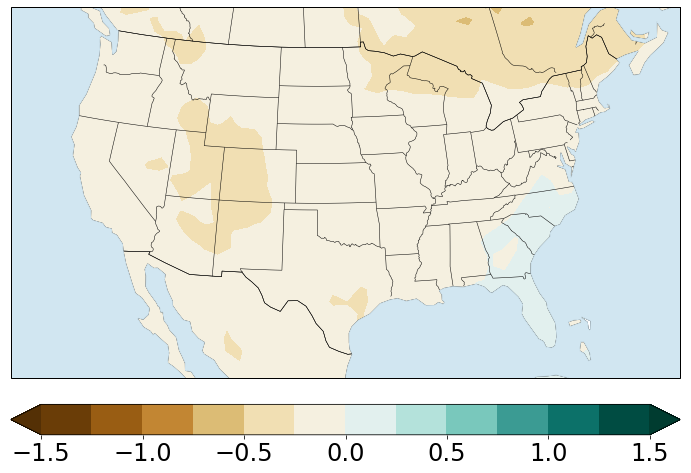

In [62]:
plot_CONUS(mme_diff)